In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/co-est2023-alldata.csv', encoding='latin1')

In [3]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,...,RNATURALCHG2023,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RINTERNATIONALMIG2023,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023
0,40,3,6,1,0,Alabama,Alabama,5024294,5031864,5050380,...,-0.306805,0.358254,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186
1,50,3,6,1,1,Alabama,Autauga County,58809,58915,59203,...,1.549122,0.253983,0.369969,0.566346,4.097597,8.526095,8.178699,4.351581,8.896064,8.745044
2,50,3,6,1,3,Alabama,Baldwin County,231768,233227,239439,...,-0.435967,0.444288,1.028870,1.163912,29.500747,28.956520,27.213932,29.945035,29.985390,28.377843
3,50,3,6,1,5,Alabama,Barbour County,25229,24969,24533,...,-3.368165,0.000000,0.081246,0.527544,-12.645954,9.627689,-1.826113,-12.645954,9.708935,-1.298570
4,50,3,6,1,7,Alabama,Bibb County,22301,22188,22359,...,-2.280294,0.044896,0.045101,0.045606,11.403686,-13.665577,-3.146805,11.448582,-13.620476,-3.101199


### Create FIPs codes
FIPs codes are five digits. We should pad STATE and COUNTY to create the new FIPS column

In [24]:
df['STATE'] = df['STATE'].astype(str)
df['COUNTY'] = df['COUNTY'].astype(str)

df['FIPS'] = df['FIPS'].astype(str).str.zfill(5)

### Add Region Names

In [5]:
region_mapping = {
    1: 'North East',
    2: 'Midwest',
    3: 'South',
    4: 'West'
}

# Apply the mapping to the REGION column
df['REGION_NAME'] = df['REGION'].map(region_mapping)

In [6]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,...,RINTERNATIONALMIG2022,RINTERNATIONALMIG2023,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023,FIPS,REGION_NAME
0,40,3,6,1,0,Alabama,Alabama,5024294,5031864,5050380,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,1000,South
1,50,3,6,1,1,Alabama,Autauga County,58809,58915,59203,...,0.369969,0.566346,4.097597,8.526095,8.178699,4.351581,8.896064,8.745044,1001,South
2,50,3,6,1,3,Alabama,Baldwin County,231768,233227,239439,...,1.028870,1.163912,29.500747,28.956520,27.213932,29.945035,29.985390,28.377843,1003,South
3,50,3,6,1,5,Alabama,Barbour County,25229,24969,24533,...,0.081246,0.527544,-12.645954,9.627689,-1.826113,-12.645954,9.708935,-1.298570,1005,South
4,50,3,6,1,7,Alabama,Bibb County,22301,22188,22359,...,0.045101,0.045606,11.403686,-13.665577,-3.146805,11.448582,-13.620476,-3.101199,1007,South


In [7]:
state_data = df[df['COUNTY'] == "0"]
state_data

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,...,RINTERNATIONALMIG2022,RINTERNATIONALMIG2023,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023,FIPS,REGION_NAME
0,40,3,6,1,0,Alabama,Alabama,5024294,5031864,5050380,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,1000,South
68,40,4,9,2,0,Alaska,Alaska,733374,732964,734923,...,3.209374,2.732699,-4.016658,-9.810659,-7.558557,-2.827193,-6.601285,-4.825859,2000,West
99,40,4,8,4,0,Arizona,Arizona,7157902,7186683,7272487,...,3.046282,2.924236,11.382396,9.536437,4.890036,12.490343,12.582720,7.814272,4000,West
115,40,3,7,5,0,Arkansas,Arkansas,3011490,3014348,3028443,...,1.058463,1.339846,5.893303,6.202955,5.922668,6.338793,7.261417,7.262514,5000,South
191,40,4,9,6,0,California,California,39538212,39503200,39145060,...,3.236322,3.871045,-11.668713,-8.512685,-8.675533,-10.546858,-5.276363,-4.804488,6000,West
250,40,4,8,8,0,Colorado,Colorado,5773707,5785219,5811596,...,1.787235,2.036242,0.931980,1.162312,1.234955,1.606820,2.949547,3.271196,8000,West
315,40,1,1,9,0,Connecticut,Connecticut,3605912,3577586,3603691,...,4.315348,4.224813,5.300450,-2.795465,-2.495474,7.031897,1.519883,1.729339,9000,North East
325,40,3,5,10,0,Delaware,Delaware,989946,991862,1004881,...,2.349408,2.220003,13.305668,12.516672,10.061672,14.246200,14.866080,12.281674,10000,South
329,40,3,5,11,0,District of Columbia,District of Columbia,689548,670839,669037,...,6.756787,10.325049,-9.778517,-7.338883,-2.235686,-7.173798,-0.582096,8.089362,11000,South
331,40,3,5,12,0,Florida,Florida,21538216,21591299,21830708,...,5.501060,7.955726,11.267052,14.426053,8.669383,13.425635,19.927113,16.625109,12000,South


## Percent Change by State

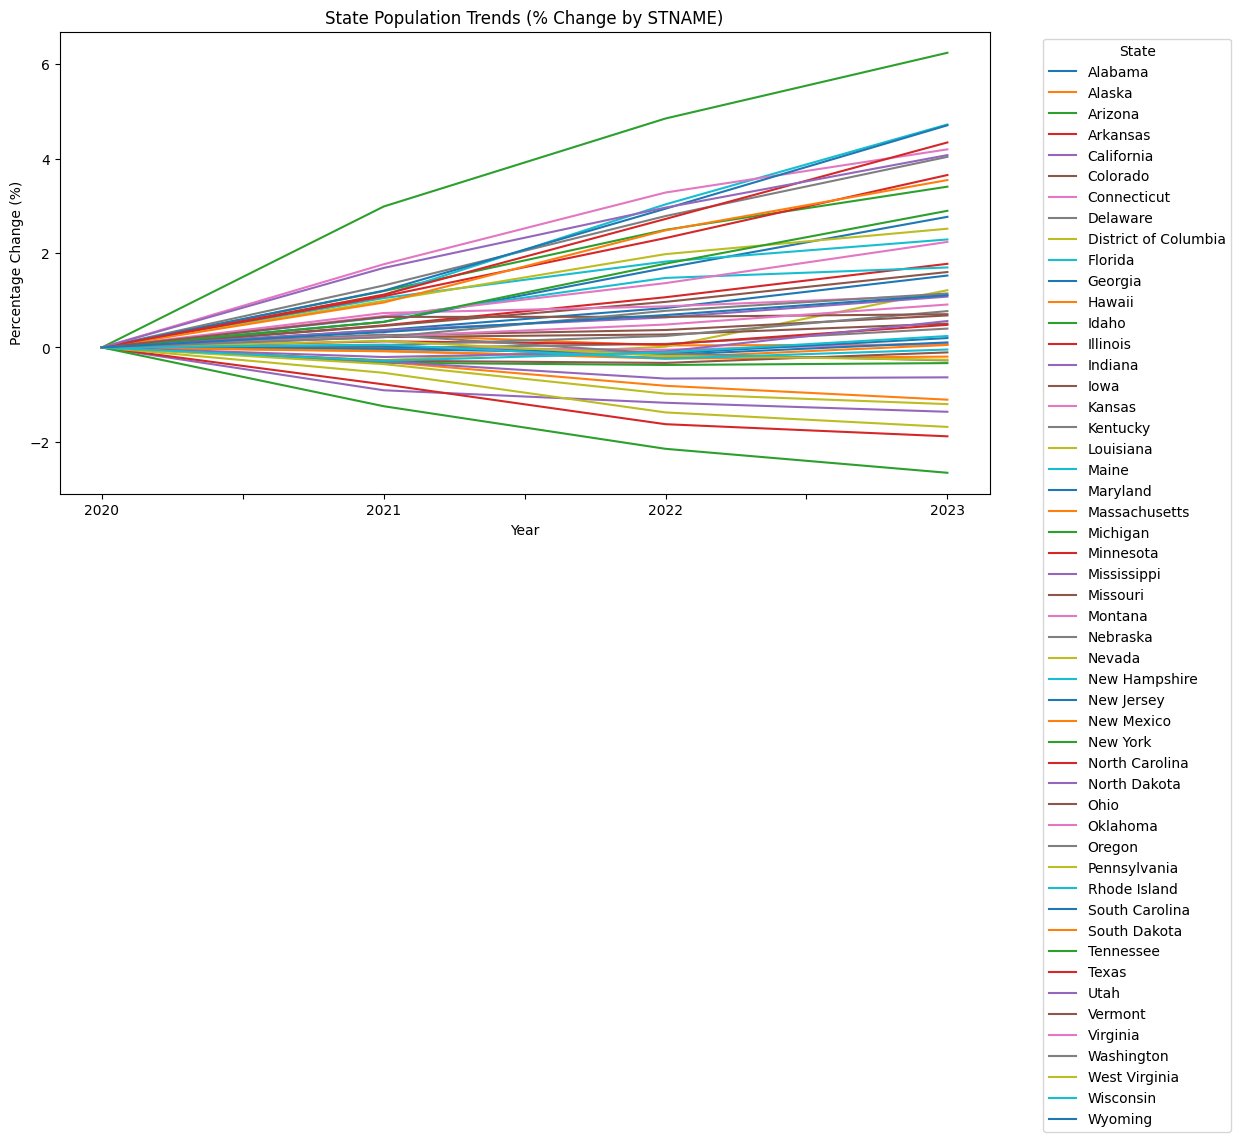

In [8]:
# Calculate percentage change 
percent_change_data = state_data.set_index('STNAME')[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022', 'POPESTIMATE2023']].apply(
    lambda x: (x - x.iloc[0]) / x.iloc[0] * 100, axis=1
)

percent_change_data = percent_change_data.rename(columns={
    'POPESTIMATE2020': '2020',
    'POPESTIMATE2021': '2021',
    'POPESTIMATE2022': '2022',
    'POPESTIMATE2023': '2023'
})

percent_change_data.T.plot(figsize=(12, 6))
plt.title('State Population Trends (% Change by STNAME)')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Largest Percentage Changes by State

/var/folders/y6/cqq_kqw13z58pgr6c9f3fzdm0000gn/T/ipykernel_72643/1622378958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['PERCENT_CHANGE'] = ((state_data['POPESTIMATE2023'] - state_data['POPESTIMATE2020']) / state_data['POPESTIMATE2020']) * 100


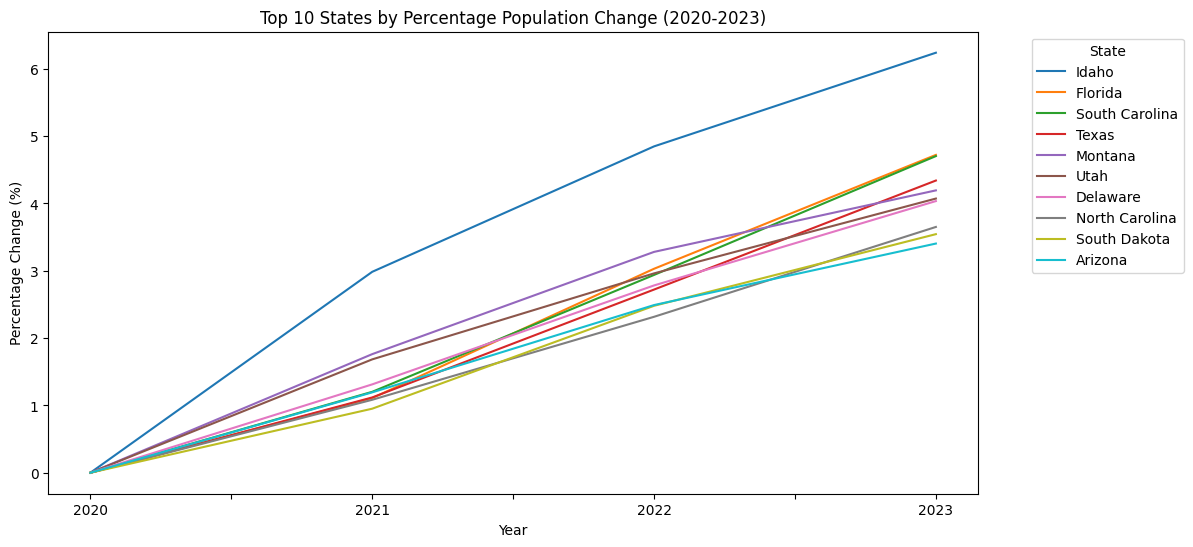

In [9]:
state_data['PERCENT_CHANGE'] = ((state_data['POPESTIMATE2023'] - state_data['POPESTIMATE2020']) / state_data['POPESTIMATE2020']) * 100

top_states = state_data.nlargest(10, 'PERCENT_CHANGE').set_index('STNAME')

top_states_percent_change = top_states[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022', 'POPESTIMATE2023']].apply(
    lambda x: (x - x.iloc[0]) / x.iloc[0] * 100, axis=1
)

top_states_percent_change = top_states_percent_change.rename(columns={
    'POPESTIMATE2020': '2020',
    'POPESTIMATE2021': '2021',
    'POPESTIMATE2022': '2022',
    'POPESTIMATE2023': '2023'
})

top_states_percent_change.T.plot(figsize=(12, 6))
plt.title('Top 10 States by Percentage Population Change (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


High rates of population growth may 

## Natural Growth
Look at population changes just by birth and deaths over 2023.

/var/folders/y6/cqq_kqw13z58pgr6c9f3fzdm0000gn/T/ipykernel_72643/1351450422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['NATURAL_GROWTH'] = state_data['BIRTHS2023'] - state_data['DEATHS2023']


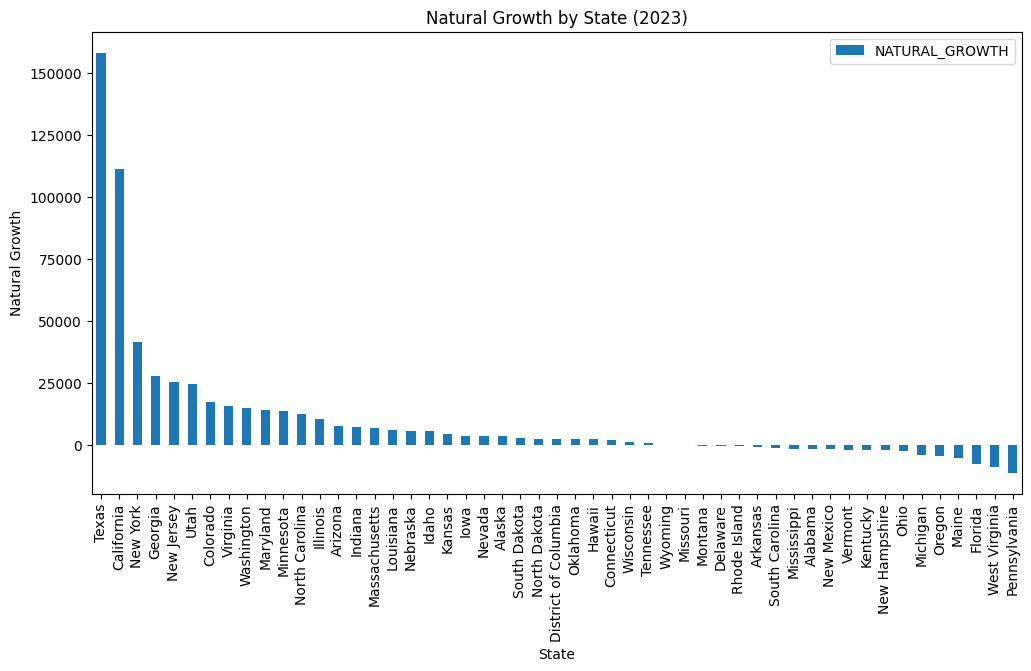

In [10]:
state_data['NATURAL_GROWTH'] = state_data['BIRTHS2023'] - state_data['DEATHS2023']

state_data[['STNAME', 'NATURAL_GROWTH']].sort_values('NATURAL_GROWTH', ascending=False).set_index('STNAME').plot(kind='bar', figsize=(12, 6))
plt.title('Natural Growth by State (2023)')
plt.xlabel('State')
plt.ylabel('Natural Growth')
plt.show()


## Migration Patterns

/var/folders/y6/cqq_kqw13z58pgr6c9f3fzdm0000gn/T/ipykernel_72643/2190612522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['NET_MIGRATION'] = state_data['INTERNATIONALMIG2023'] + state_data['DOMESTICMIG2023']


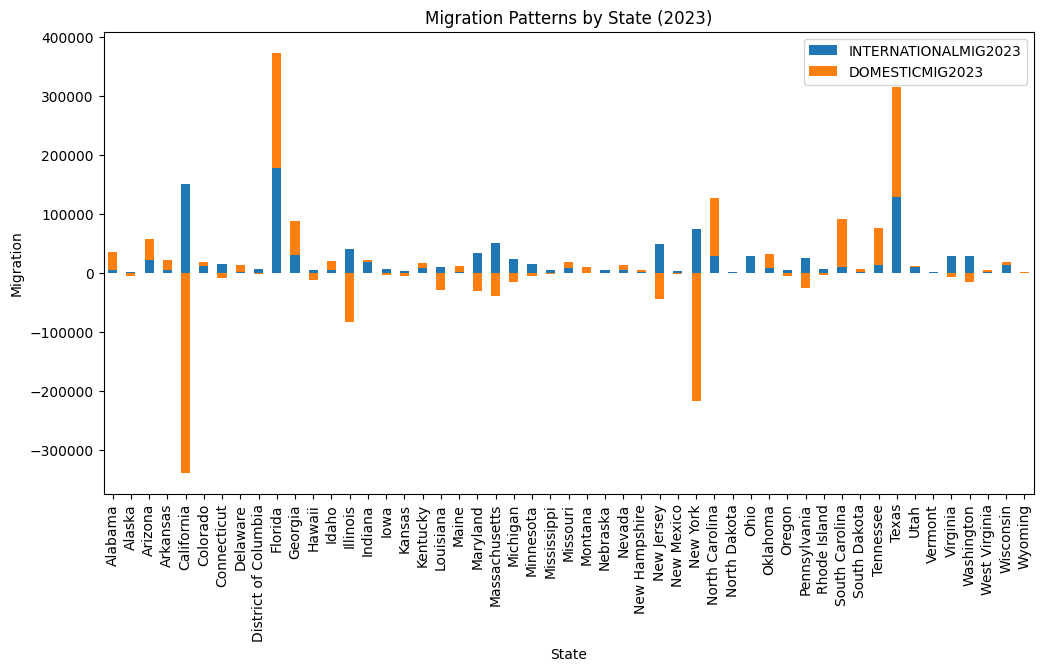

In [11]:
state_data['NET_MIGRATION'] = state_data['INTERNATIONALMIG2023'] + state_data['DOMESTICMIG2023']

state_data[['STNAME', 'INTERNATIONALMIG2023', 'DOMESTICMIG2023']].set_index('STNAME').plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Migration Patterns by State (2023)')
plt.xlabel('State')
plt.ylabel('Migration')
plt.show()


In [12]:
state_summary = state_data[['STNAME', 'POPESTIMATE2023', 'NATURALCHG2023', 'NET_MIGRATION']]
print(state_summary.sort_values('POPESTIMATE2023', ascending=False))

                    STNAME  POPESTIMATE2023  NATURALCHG2023  NET_MIGRATION
191             California         38965193          111416        -187389
2568                 Texas         30503301          158253         315301
331                Florida         22610726           -7603         372870
1862              New York         19571216           41536        -142911
2284          Pennsylvania         12961683          -11079            951
610               Illinois         12549689           10453         -43347
2080                  Ohio         11785935           -2462          28718
399                Georgia         11029227           27817          88325
1925        North Carolina         10835491           12657         126712
1255              Michigan         10037261           -4030           7766
1806            New Jersey          9290841           25492           4632
2868              Virginia          8715698           15689          21132
3002            Washingto

## Regional Comparisons

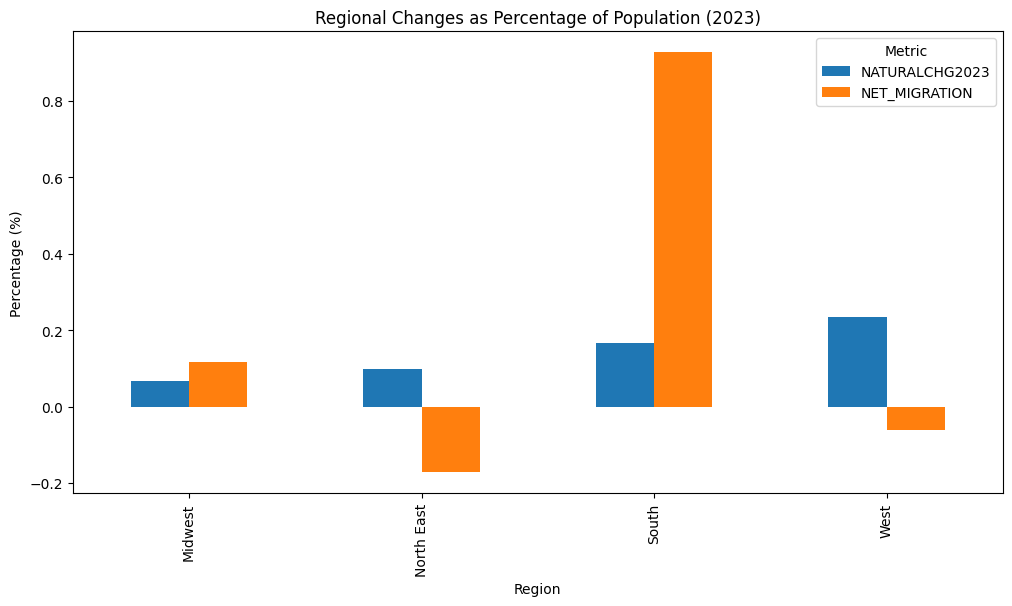

In [13]:
region_data = state_data.groupby('REGION_NAME')[['POPESTIMATE2023', 'NATURALCHG2023', 'NET_MIGRATION']].sum()

region_data_percentage = region_data.div(region_data['POPESTIMATE2023'], axis=0) * 100

region_data_percentage[['NATURALCHG2023', 'NET_MIGRATION']].plot(kind='bar', figsize=(12, 6))
plt.title('Regional Changes as Percentage of Population (2023)')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.legend(title='Metric')
plt.show()


## Land Area Analysis

In [17]:
land_area_df = pd.read_csv('data/2024_Gaz_counties_national.txt', sep='\t')

In [21]:
land_area_df.head()

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,1539631459,25677536,594.455,9.914,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4117781416,1132830835,1589.884,437.388,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2292160151,50523213,885.008,19.507,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1612188713,9572302,622.470,3.696,33.015893,-87.127148
4,AL,1009,161530,Blount County,1670259099,14860281,644.891,5.738,33.977358,-86.566440


In [20]:
land_area_df.dtypes

USPS                                                                                                                         object
GEOID                                                                                                                         int64
ANSICODE                                                                                                                      int64
NAME                                                                                                                         object
ALAND                                                                                                                         int64
AWATER                                                                                                                        int64
ALAND_SQMI                                                                                                                  float64
AWATER_SQMI                                                                 

In [22]:
land_area_df['FIPS'] = land_area_df['GEOID'].astype(str).str.zfill(5)
land_area_df = land_area_df[['FIPS', 'ALAND_SQMI', 'AWATER_SQMI']]

In [25]:
df = df.merge(land_area_df, on='FIPS', how='left')

In [26]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,...,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023,FIPS,REGION_NAME,ALAND_SQMI,AWATER_SQMI
0,40,3,6,1,0,Alabama,Alabama,5024294,5031864,5050380,...,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,01000,South,NaN,NaN
1,50,3,6,1,1,Alabama,Autauga County,58809,58915,59203,...,4.097597,8.526095,8.178699,4.351581,8.896064,8.745044,01001,South,594.455,9.914
2,50,3,6,1,3,Alabama,Baldwin County,231768,233227,239439,...,29.500747,28.956520,27.213932,29.945035,29.985390,28.377843,01003,South,1589.884,437.388
3,50,3,6,1,5,Alabama,Barbour County,25229,24969,24533,...,-12.645954,9.627689,-1.826113,-12.645954,9.708935,-1.298570,01005,South,885.008,19.507
4,50,3,6,1,7,Alabama,Bibb County,22301,22188,22359,...,11.403686,-13.665577,-3.146805,11.448582,-13.620476,-3.101199,01007,South,622.470,3.696


In [27]:
df['POP_DENSITY_2023'] = df['POPESTIMATE2023'] / df['ALAND_SQMI'].replace(0, np.nan)
df['POP_DENSITY_2023'].fillna(0, inplace=True)  

/var/folders/y6/cqq_kqw13z58pgr6c9f3fzdm0000gn/T/ipykernel_72643/1211542573.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['POP_DENSITY_2023'].fillna(0, inplace=True)  # Optionally fill NaNs with 0


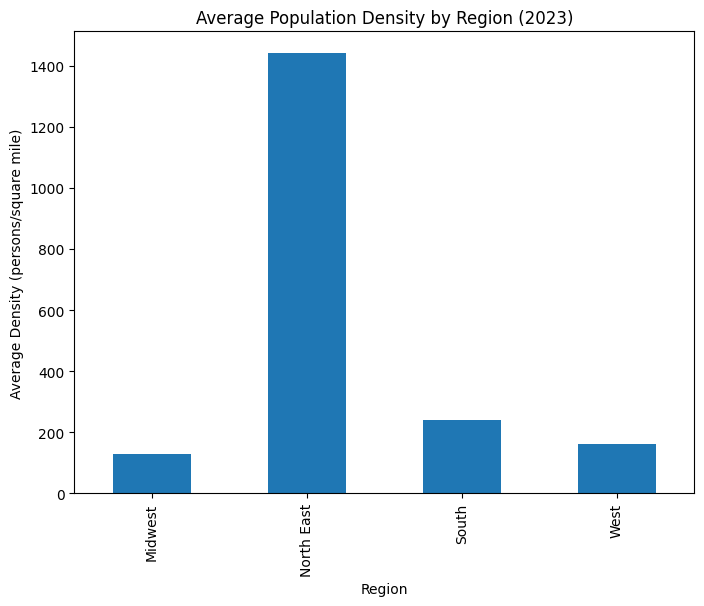

In [30]:
# Filter out rows with population density equal to 0
df_filtered = df[df['POP_DENSITY_2023'] > 0]

regional_density = df_filtered.groupby('REGION_NAME')['POP_DENSITY_2023'].mean()

regional_density.plot(kind='bar', figsize=(8, 6))
plt.title('Average Population Density by Region (2023)')
plt.xlabel('Region')
plt.ylabel('Average Density (persons/square mile)')
plt.show()


In [15]:
trajectories_df.dtypes 

NameError: name 'trajectories_df' is not defined

## Trajectories Dataset EDA